In [1]:
from   matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from   sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
! ls ../../..

README.md                          edx
Superstore.xls                     end_to_end_TS_forecasting.py.ipynb
basic                              fish
classical_TS.py.ipynb              multivariate
cointegrated                       penn
coursera                           python
data                               rMARSS


In [3]:
!ls ../../../data

IBM_monthly.csv                      inflation-consumer-prices-annual.csv
Monthly_CO2_Concentrations.csv       or_monthly_mean_temp_1895-2019.csv
coloradoflow.dat                     or_monthly_mean_temp_1895-2019.txt


In [4]:
DATA = '../../../data'
data = pd.read_csv(f'{DATA}/Monthly_CO2_Concentrations.csv')
data.drop([col for col in list(data) if col.startswith('Unnamed')],
          axis=1,
          inplace=True)
data.sort_values(['Year', 'Month'], inplace=True)
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


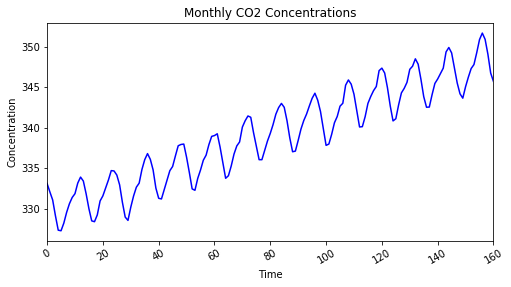

In [5]:
plt.figure(figsize=(8, 4))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 Concentrations')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.xticks(rotation=30);

In [6]:
trend_mod = LinearRegression(normalize=True)
trend_mod.fit(np.array(data.index).reshape((-1, 1)), data.CO2)
print(f'Intercept: {trend_mod.intercept_:.2f}\n'
      f'Time: {trend_mod.coef_[0]:.2f}')

Intercept: 329.45
Time: 0.12


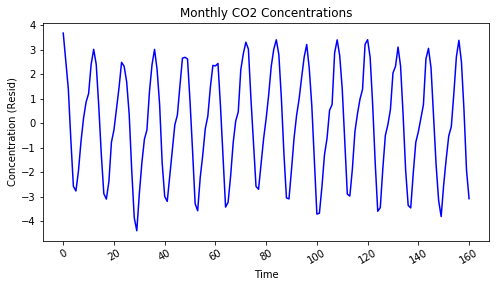

In [7]:
plt.figure(figsize=(8, 4))
fitted = trend_mod.predict(np.array(data.index).reshape((-1, 1)))
resids = np.array(data.CO2) - fitted
plt.plot(data.index, resids, 'b-')
plt.title('Monthly CO2 Concentrations')
plt.xlabel('Time')
plt.ylabel('Concentration (Resid)')
plt.xticks(rotation=30);

In [8]:
data['Residuals'] = resids
month_quarter_map = { 1: 'Q1',  2: 'Q1',  3: 'Q1',
                      4: 'Q2',  5: 'Q2',  6: 'Q2',
                      7: 'Q3',  8: 'Q3',  9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data.Month.map(lambda m: month_quarter_map[m])

In [9]:
seasonal_sub_series_data = data.groupby(
    by=['Year', 'Quarter'])['Residuals']\
    .aggregate([np.mean, np.std])

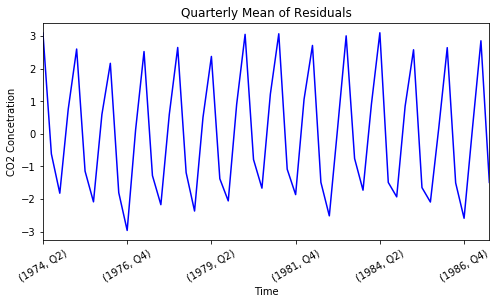

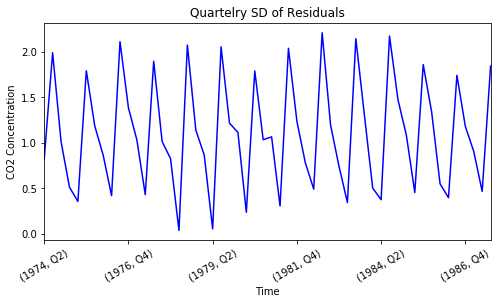

In [10]:
plt.figure(figsize=(8, 4))
seasonal_sub_series_data['mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 Concetration')
plt.xticks(rotation=30)

plt.figure(figsize=(8, 4))
seasonal_sub_series_data['std'].plot(color='b')
plt.title('Quartelry SD of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.xticks(rotation=30);

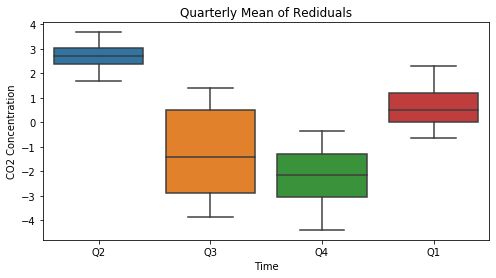

In [11]:
plt.figure(figsize=(8, 4))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Rediduals')
g.set_xlabel('Time')
g.set_ylabel('CO2 Concentration');

# Cyclical Changes

In [12]:
inflation = pd.read_csv(f'{DATA}/inflation-consumer-prices-annual.csv', 
                        parse_dates=['Year'])
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


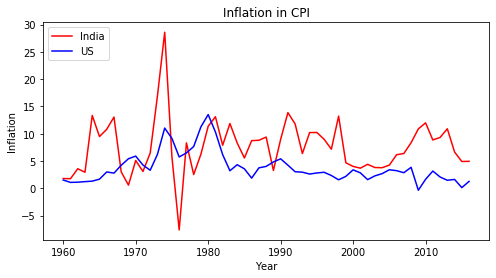

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(range(1960, 2017), inflation.India, color='r')
plt.plot(range(1960, 2017), inflation['United States'], color='b')
plt.legend(['India', 'US'], loc=2)
plt.title('Inflation in CPI')
plt.ylabel('Inflation')
plt.xlabel('Year');

### Zero-Mean Models

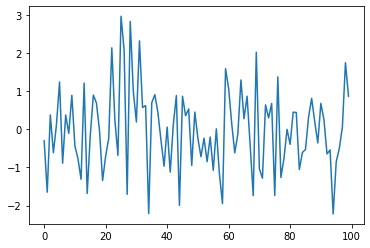

In [14]:
zero_mean_series = np.random.normal(loc=0., scale=1, size=100)
plt.plot(zero_mean_series);

# Random Walk

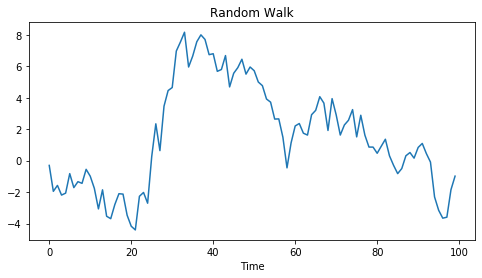

In [15]:
random_walk = np.cumsum(zero_mean_series)
plt.figure(figsize=(8, 4))
#g = sns.tsplot(random_walk) # deprecated use...
g = sns.lineplot(range(len(random_walk)), random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time');

In [19]:
!ls ../../../data

IBM_monthly.csv                      inflation-consumer-prices-annual.csv
Monthly_CO2_Concentrations.csv       or_monthly_mean_temp_1895-2019.csv
coloradoflow.dat                     or_monthly_mean_temp_1895-2019.txt


In [22]:
ibm = pd.read_csv('../../../data/IBM_monthly.csv', parse_dates=True)
ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-01,7.713333,7.713333,7.003334,7.226666,0.598839,8760000
1,1962-02-01,7.300000,7.480000,7.093333,7.160000,0.593315,5737600
2,1962-03-01,7.186666,7.413333,7.070000,7.103333,0.588699,5344000
3,1962-04-01,7.100000,7.100000,6.000000,6.053333,0.501678,12851200
4,1962-05-01,6.053333,6.530000,4.733333,5.233333,0.433720,49307200
